In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from common import *


In [2]:
r = requests.get('https://nvebiapi.nve.no/api/Magasinstatistikk/HentOffentligData')
x = r.json()
df = pd.DataFrame(x)
df = df.sort_values(by='dato_Id', ascending=True, ignore_index=True)
#df.to_csv(f"{INPUT_DATA}magasin_statistikk_nve.csv")
df.head()

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
0,1995-01-08,VASS,1,1995,1,0.631664,35.877495,22.662535,0001-01-01T00:00:00,0.664790,-0.033126
1,1995-01-08,EL,5,1995,1,0.606886,17.331083,10.517998,0001-01-01T00:00:00,0.678657,-0.071770
2,1995-01-08,VASS,2,1995,1,0.607655,23.237947,14.120653,0001-01-01T00:00:00,0.707391,-0.099736
3,1995-01-08,EL,2,1995,1,0.631189,33.898586,21.396406,0001-01-01T00:00:00,0.709973,-0.078785
4,1995-01-08,EL,4,1995,1,0.557758,20.850529,11.629552,0001-01-01T00:00:00,0.618967,-0.061209


In [3]:
def get_område(df, omrnr, data_from_year=2016):
    omr = df.loc[df['omrnr'] == omrnr]
    omr = omr.loc[omr['iso_aar'] >= data_from_year]
    omr = omr.loc[omr['omrType'] == "EL"]
    return omr

Text(0.5, 0, 'Date')

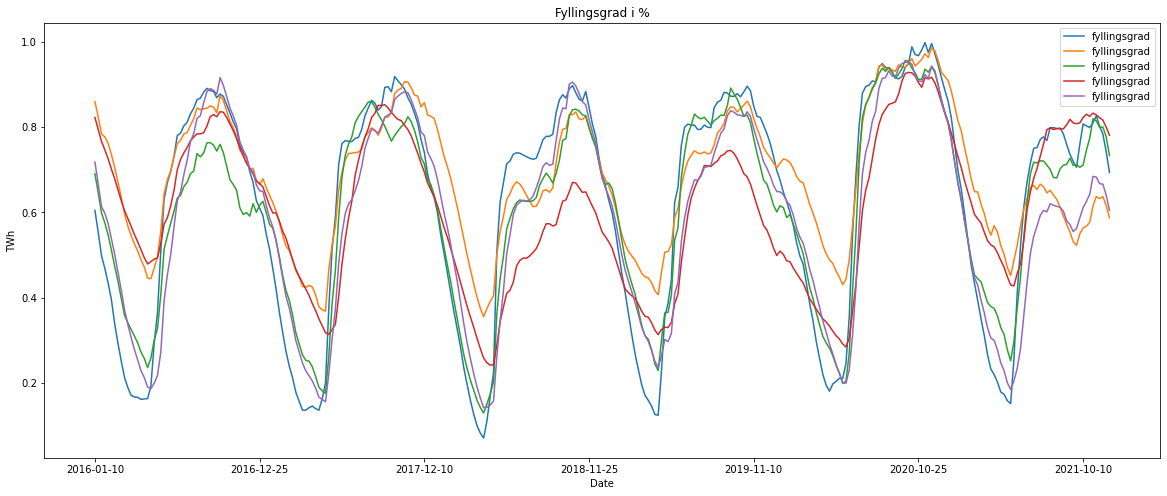

In [4]:
ax = get_område(df, 1).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

get_område(df, 2).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
get_område(df, 3).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
get_område(df, 4).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
get_område(df, 5).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
plt.title("Fyllingsgrad i %")
plt.ylabel("TWh")
plt.xlabel("Date")


Text(0.5, 0, 'Date')

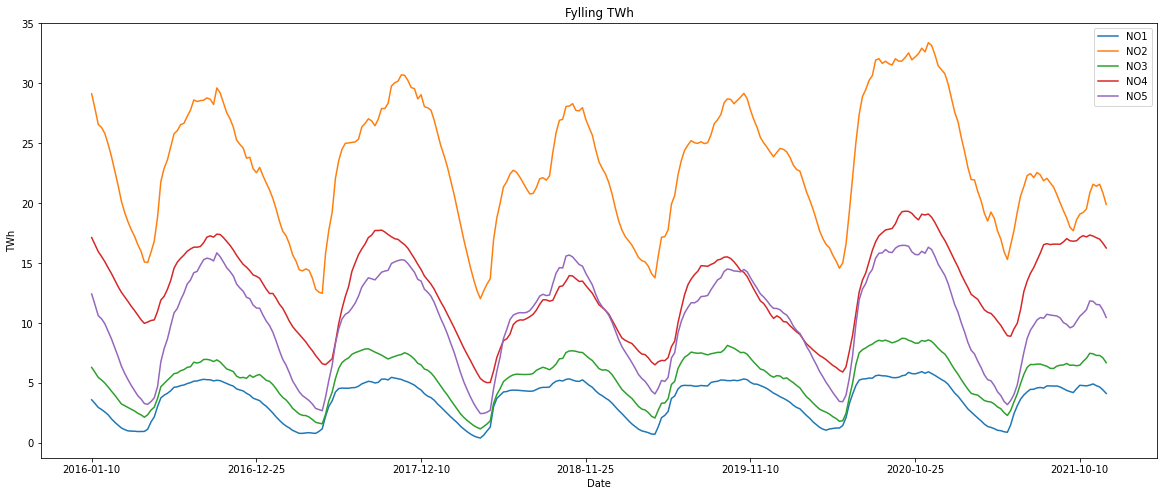

In [5]:
ax = get_område(df, 1).plot("dato_Id", "fylling_TWh", figsize=(20,8), label="NO1")
get_område(df, 2).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO2")
get_område(df, 3).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO3")
get_område(df, 4).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO4")
get_område(df, 5).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO5")
plt.title("Fylling TWh")
plt.ylabel("TWh")
plt.xlabel("Date")

<AxesSubplot:xlabel='dato_Id'>

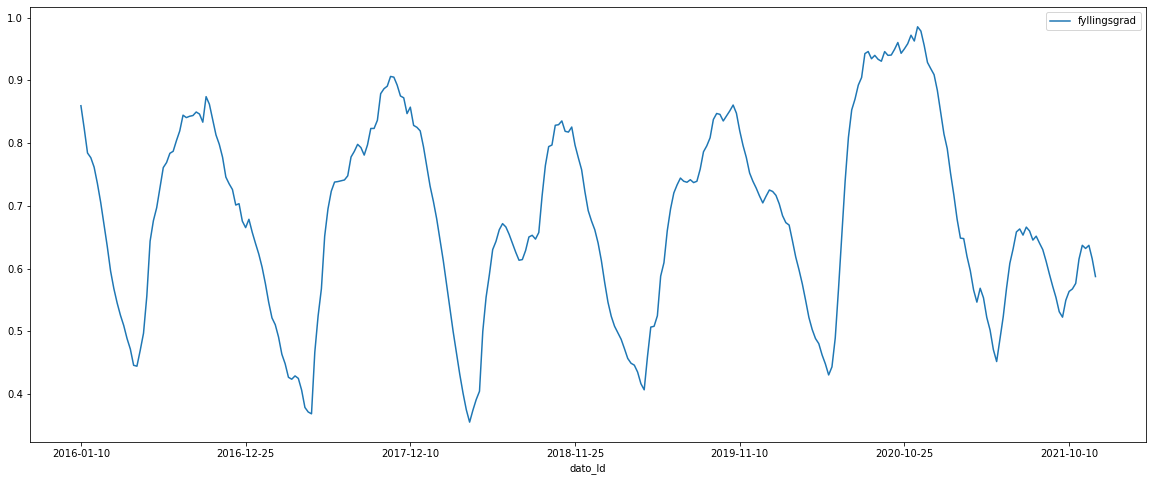

In [6]:
get_område(df, 2).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

<AxesSubplot:xlabel='dato_Id'>

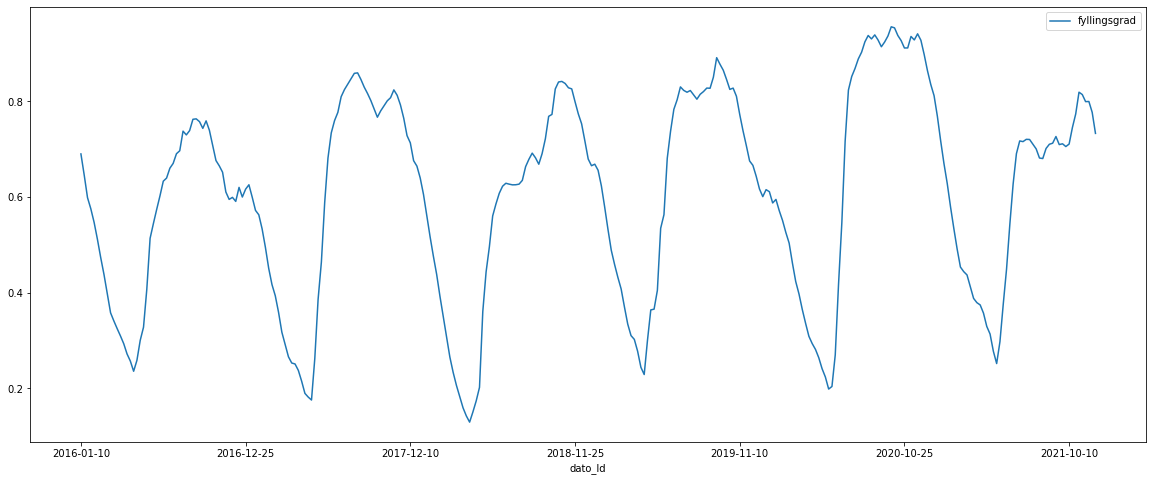

In [7]:
get_område(df, 3).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

<AxesSubplot:xlabel='dato_Id'>

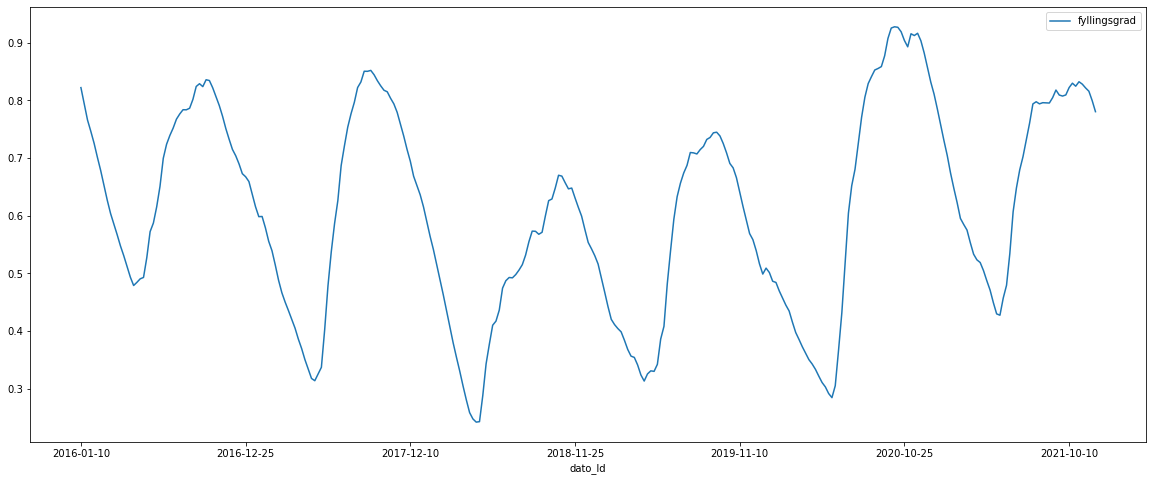

In [8]:
get_område(df, 4).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

<AxesSubplot:xlabel='dato_Id'>

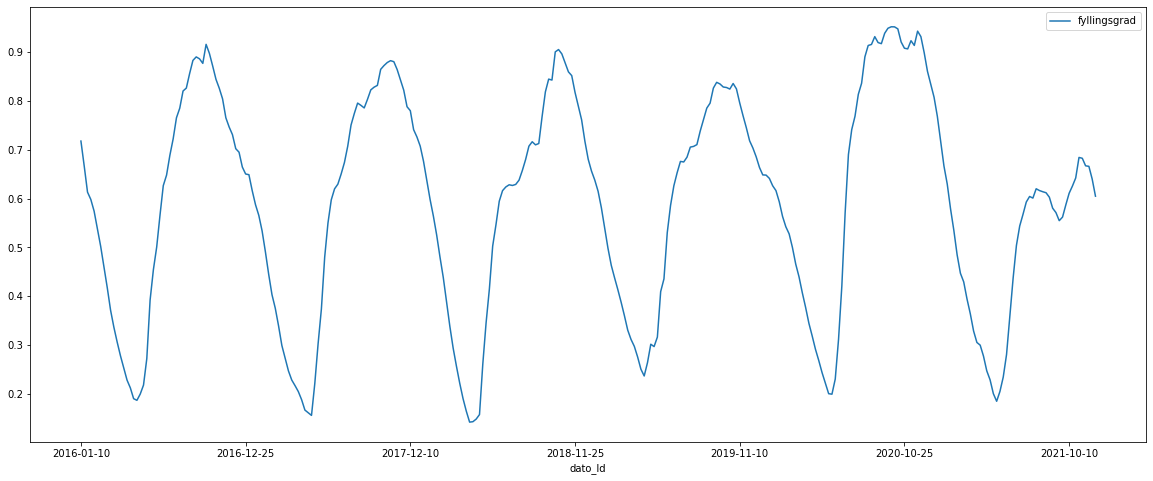

In [9]:
get_område(df, 5).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

## CREATE DATASET FOR TRAINING:  

In [10]:
df_entso = pd.read_csv("entsoe_dataset_main.csv")
df_entso.head()

,Unnamed: 0,NO1_day_ahead_prices,NO1_Actual Load,NO1_Forecasted Load,NO1_generation_actual,NO1_generation_forecast,NO2_day_ahead_prices,NO2_Actual Load,NO2_Forecasted Load,NO2_generation_actual,...,NO4_Actual Load,NO4_Forecasted Load,NO4_generation_actual,NO4_generation_forecast,NO5_day_ahead_prices,NO5_Actual Load,NO5_Forecasted Load,NO5_generation_actual,NO5_generation_forecast,dato_id
0,2016-01-01 01:00:00+01:00,16.04,4482.0,4460.0,3272.0,1649.0,16.04,4010.0,4090.0,15388.0,...,2047.0,2071.0,4628.0,2310.0,16.04,2188.0,2135.0,6506.0,3256.0,2016-01-01 01:00:00+01:00
1,2016-01-01 02:00:00+01:00,15.74,4421.0,4401.0,3264.0,1640.0,15.74,3930.0,4001.0,14876.0,...,2070.0,2082.0,4434.0,2227.0,15.74,2155.0,2115.0,6284.0,3160.0,2016-01-01 02:00:00+01:00
2,2016-01-01 03:00:00+01:00,15.57,4335.0,4323.0,3250.0,1637.0,15.57,3839.0,3920.0,14242.0,...,2032.0,2047.0,4294.0,2166.0,15.57,2139.0,2085.0,6110.0,3086.0,2016-01-01 03:00:00+01:00
3,2016-01-01 04:00:00+01:00,15.47,4304.0,4279.0,3266.0,1642.0,15.47,3833.0,3925.0,14082.0,...,2041.0,2055.0,4286.0,2156.0,15.47,2141.0,2090.0,6042.0,3041.0,2016-01-01 04:00:00+01:00
4,2016-01-01 05:00:00+01:00,15.75,4336.0,4320.0,3272.0,1645.0,15.75,3944.0,4030.0,14492.0,...,2069.0,2088.0,4490.0,2258.0,15.75,2168.0,2112.0,6234.0,3136.0,2016-01-01 05:00:00+01:00


In [11]:

def get_fyllingsgrad_array(omrnr:int, data_from_year:int)->pd.DataFrame:   
    df['year'] = pd.DatetimeIndex(df['dato_Id']).year
    omr = df.loc[df['omrnr'] == omrnr]
    omr = omr.loc[omr['year'] >= data_from_year]
    omr = omr.loc[omr['omrType'] == "EL"]
    omr = omr["fyllingsgrad"]
    return omr.to_numpy()




In [12]:
for omrnr in range(1,6):
     #init empty array with nans   
     magasin_stats = np.empty(len(df_entso))
     magasin_stats[:] = np.nan
     fyllingsgrad_array = get_fyllingsgrad_array(omrnr,2016)
     #fill array with 1 weekly magazine-stat, the rest of the week as NaN:
     nve_time_step = 0
     for timestep in range(0,len(magasin_stats),(24*7)):
          magasin_stats[timestep] = fyllingsgrad_array[nve_time_step]
          nve_time_step+=1
     #Add stats to entso:
     df_entso[f"NO{omrnr}_Fyllingsgrad_NVE"] = magasin_stats

     print(f"Number of Non-Nan values after filling: {np.count_nonzero(~np.isnan(magasin_stats))}")
     
#Save to csv:      
#df_entso.to_csv(f"{INPUT_DATA}entso_NVE.csv")
     

Number of Non-Nan values after filling: 308
Number of Non-Nan values after filling: 308
Number of Non-Nan values after filling: 308
Number of Non-Nan values after filling: 308
Number of Non-Nan values after filling: 308


In [13]:
df_entso.head()

,Unnamed: 0,NO1_day_ahead_prices,NO1_Actual Load,NO1_Forecasted Load,NO1_generation_actual,NO1_generation_forecast,NO2_day_ahead_prices,NO2_Actual Load,NO2_Forecasted Load,NO2_generation_actual,...,NO5_Actual Load,NO5_Forecasted Load,NO5_generation_actual,NO5_generation_forecast,dato_id,NO1_Fyllingsgrad_NVE,NO2_Fyllingsgrad_NVE,NO3_Fyllingsgrad_NVE,NO4_Fyllingsgrad_NVE,NO5_Fyllingsgrad_NVE
0,2016-01-01 01:00:00+01:00,16.04,4482.0,4460.0,3272.0,1649.0,16.04,4010.0,4090.0,15388.0,...,2188.0,2135.0,6506.0,3256.0,2016-01-01 01:00:00+01:00,0.65275,0.893212,0.730147,0.848484,0.762567
1,2016-01-01 02:00:00+01:00,15.74,4421.0,4401.0,3264.0,1640.0,15.74,3930.0,4001.0,14876.0,...,2155.0,2115.0,6284.0,3160.0,2016-01-01 02:00:00+01:00,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 03:00:00+01:00,15.57,4335.0,4323.0,3250.0,1637.0,15.57,3839.0,3920.0,14242.0,...,2139.0,2085.0,6110.0,3086.0,2016-01-01 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 04:00:00+01:00,15.47,4304.0,4279.0,3266.0,1642.0,15.47,3833.0,3925.0,14082.0,...,2141.0,2090.0,6042.0,3041.0,2016-01-01 04:00:00+01:00,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 05:00:00+01:00,15.75,4336.0,4320.0,3272.0,1645.0,15.75,3944.0,4030.0,14492.0,...,2168.0,2112.0,6234.0,3136.0,2016-01-01 05:00:00+01:00,NaN,NaN,NaN,NaN,NaN


### Interpolate Nan: 

In [14]:
for omrnr in range(1,6):
    df_entso[f"NO{omrnr}_Fyllingsgrad_NVE"].interpolate(method= "linear", inplace= True)
#Save to csv:      
#df_entso.to_csv(f"{INPUT_DATA}entso_NVE_interpolated.csv")

In [15]:
df_entso.head()

,Unnamed: 0,NO1_day_ahead_prices,NO1_Actual Load,NO1_Forecasted Load,NO1_generation_actual,NO1_generation_forecast,NO2_day_ahead_prices,NO2_Actual Load,NO2_Forecasted Load,NO2_generation_actual,...,NO5_Actual Load,NO5_Forecasted Load,NO5_generation_actual,NO5_generation_forecast,dato_id,NO1_Fyllingsgrad_NVE,NO2_Fyllingsgrad_NVE,NO3_Fyllingsgrad_NVE,NO4_Fyllingsgrad_NVE,NO5_Fyllingsgrad_NVE
0,2016-01-01 01:00:00+01:00,16.04,4482.0,4460.0,3272.0,1649.0,16.04,4010.0,4090.0,15388.0,...,2188.0,2135.0,6506.0,3256.0,2016-01-01 01:00:00+01:00,0.652750,0.893212,0.730147,0.848484,0.762567
1,2016-01-01 02:00:00+01:00,15.74,4421.0,4401.0,3264.0,1640.0,15.74,3930.0,4001.0,14876.0,...,2155.0,2115.0,6284.0,3160.0,2016-01-01 02:00:00+01:00,0.652462,0.893012,0.729909,0.848328,0.762300
2,2016-01-01 03:00:00+01:00,15.57,4335.0,4323.0,3250.0,1637.0,15.57,3839.0,3920.0,14242.0,...,2139.0,2085.0,6110.0,3086.0,2016-01-01 03:00:00+01:00,0.652175,0.892811,0.729671,0.848171,0.762034
3,2016-01-01 04:00:00+01:00,15.47,4304.0,4279.0,3266.0,1642.0,15.47,3833.0,3925.0,14082.0,...,2141.0,2090.0,6042.0,3041.0,2016-01-01 04:00:00+01:00,0.651887,0.892610,0.729433,0.848015,0.761767
4,2016-01-01 05:00:00+01:00,15.75,4336.0,4320.0,3272.0,1645.0,15.75,3944.0,4030.0,14492.0,...,2168.0,2112.0,6234.0,3136.0,2016-01-01 05:00:00+01:00,0.651600,0.892409,0.729195,0.847859,0.761500


In [36]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df_test = df_entso.tail(500*24)
df_test[["NO1_day_ahead_prices"]] = scaler.fit_transform(df_test[["NO1_day_ahead_prices"]])
df_test[["NO1_Actual Load"]] = scaler.fit_transform(df_test[["NO1_Actual Load"]])
df_test[["NO1_generation_actual"]] = scaler.fit_transform(df_test[["NO1_generation_actual"]])


/opt/anaconda3/envs/in5520/lib/python3.9/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/envs/in5520/lib/python3.9/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/envs/in5520/lib/python3.9/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

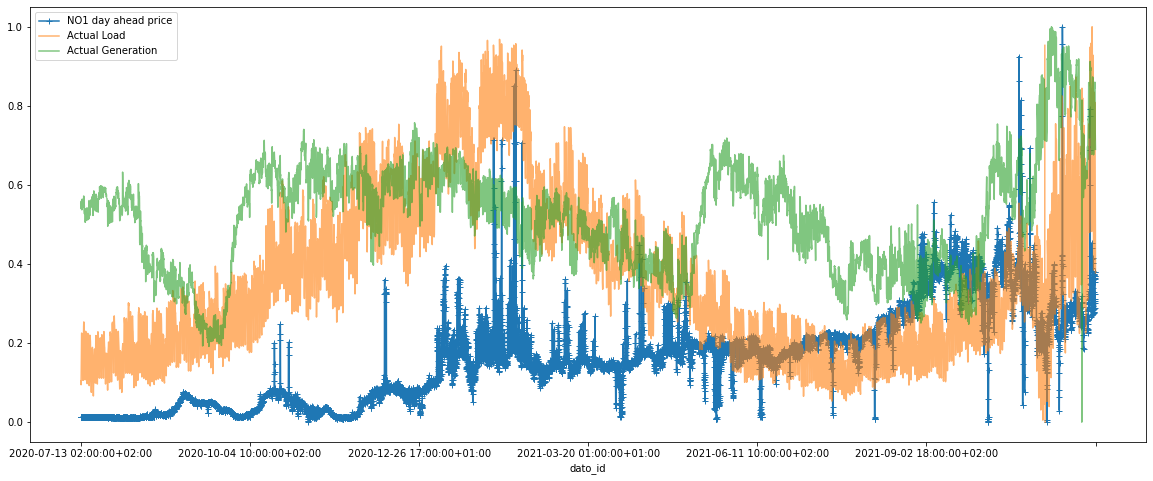

In [37]:
ax = df_test.plot("dato_id", "NO1_day_ahead_prices", figsize=(20,8),style='+-' ,label="NO1 day ahead price")
df_test.plot("dato_id", "NO1_Actual Load", figsize=(20,8), ax=ax,alpha = 0.6, label="Actual Load")
df_test.plot("dato_id", "NO1_generation_actual", figsize=(20,8), ax=ax,alpha = 0.6, label="Actual Generation")
plt.legend()

In [38]:
df_test[["NO1_day_ahead_prices", "NO1_Actual Load", "NO1_generation_actual"]].corr()

,NO1_day_ahead_prices,NO1_Actual Load,NO1_generation_actual
NO1_day_ahead_prices,1.000000,0.069556,0.037732
NO1_Actual Load,0.069556,1.000000,0.437391
NO1_generation_actual,0.037732,0.437391,1.000000


,A,B
A,1.0,1.0
B,1.0,1.0
